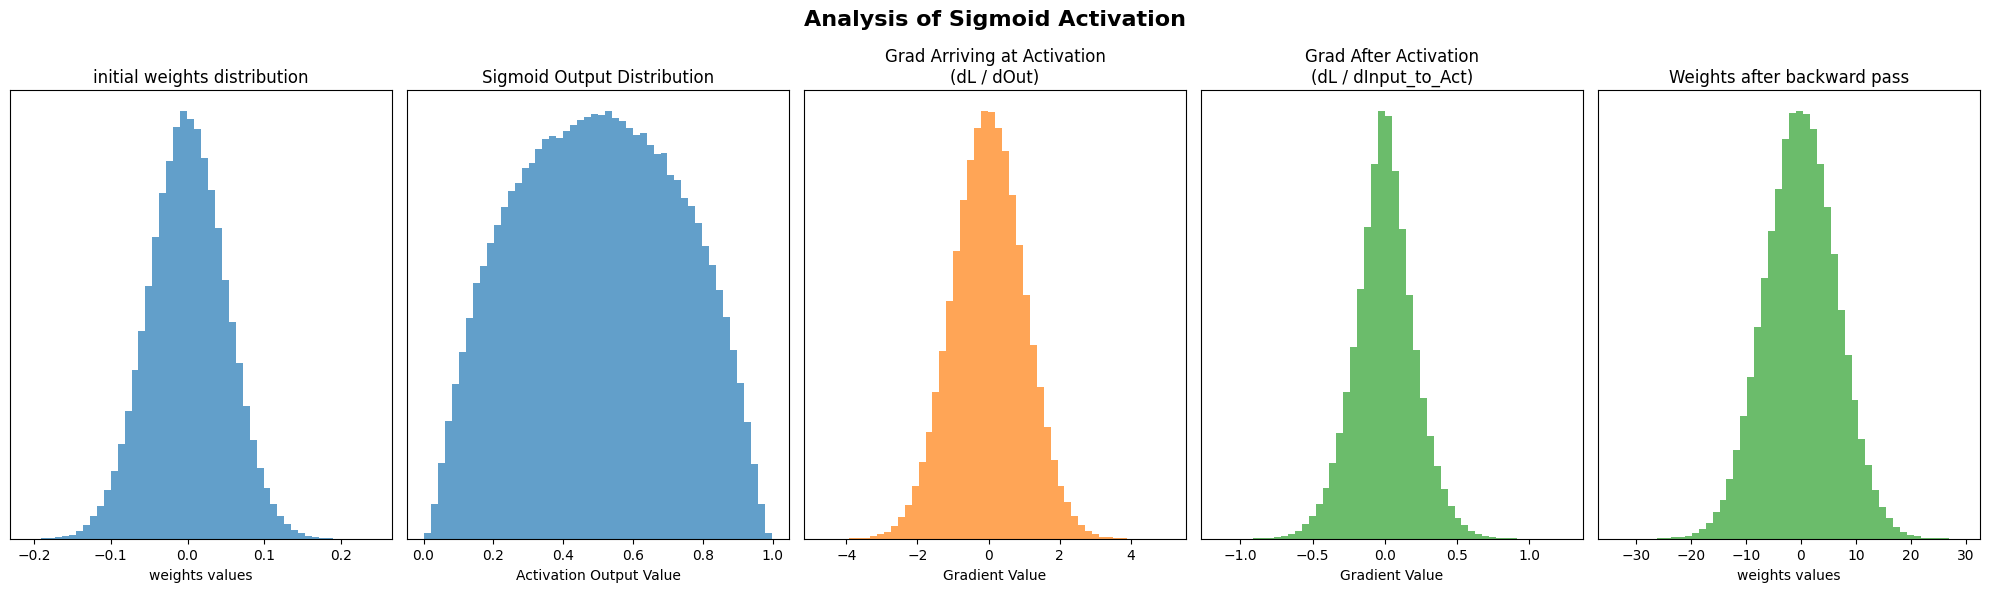

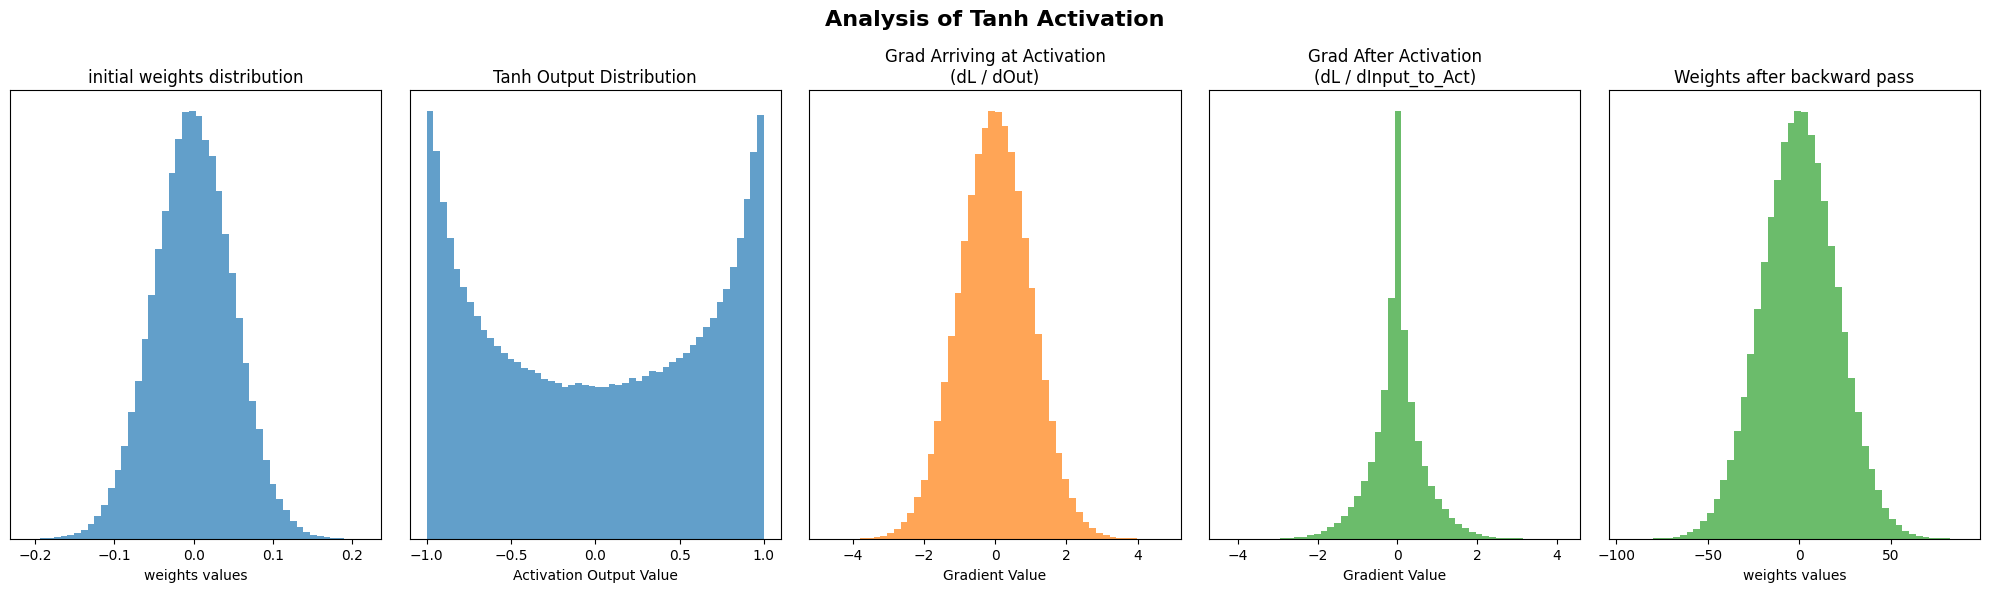

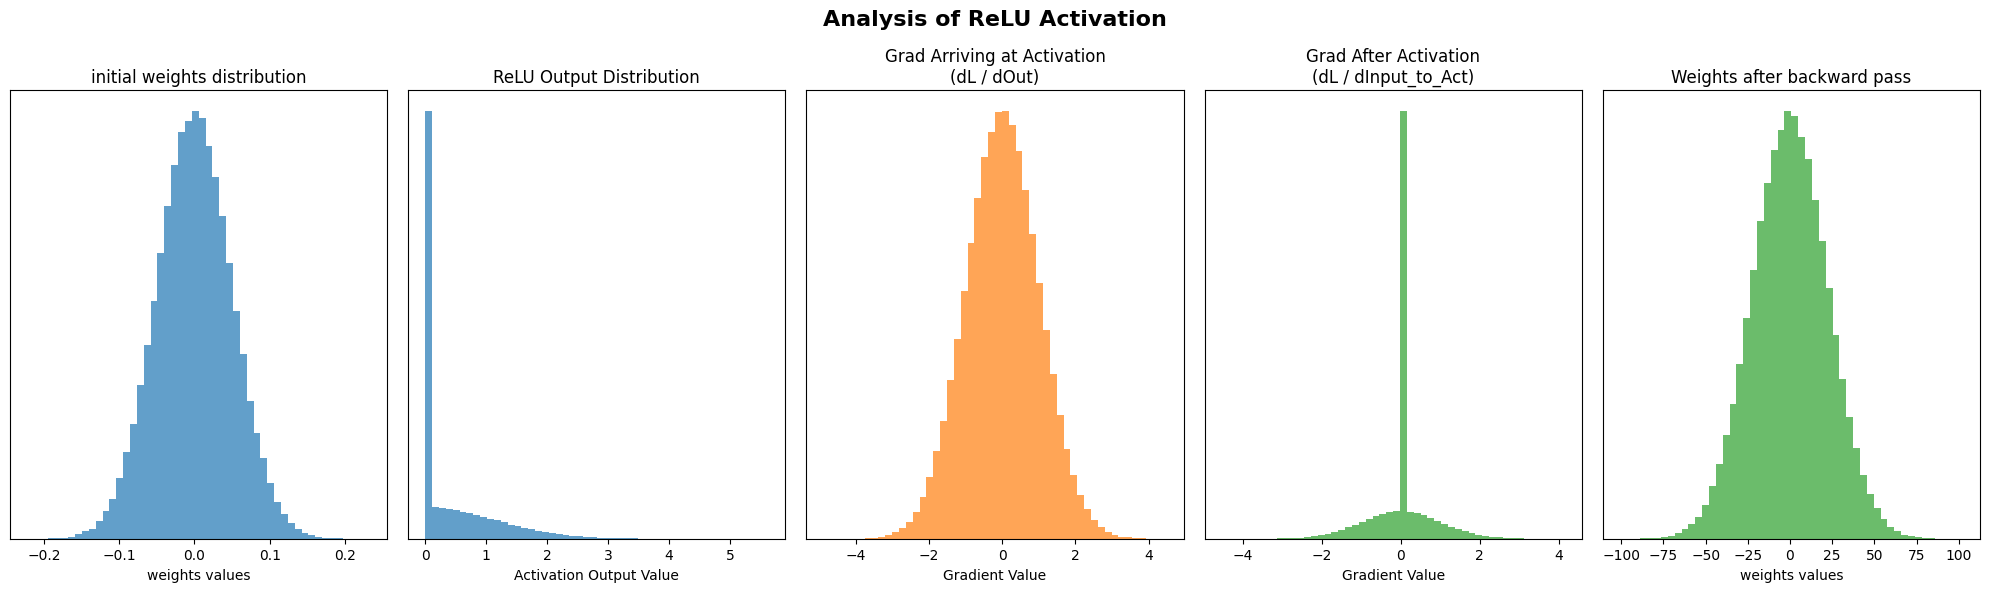

In [29]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


N_SAMPLES = 1000
DIM_INPUT = 500
DIM_HIDDEN = 500


activation_functions = {
    'Sigmoid': torch.sigmoid,
    'Tanh': torch.tanh,
    'ReLU': torch.relu
}

def visualize_layer(act_name, act_fn):
    X = torch.randn(N_SAMPLES, DIM_INPUT, requires_grad=True)
    W = torch.randn(DIM_INPUT, DIM_HIDDEN,  requires_grad=True) * 0.05
    W.retain_grad()
    
    plt.figure(figsize=(20, 6))
    plt.suptitle(f'Analysis of {act_name} Activation', fontsize=16, fontweight='bold')
    
    plt.subplot(1, 5, 1)
    plt.hist(W.data.view(-1).numpy(), bins=50, color='#1f77b4', alpha=0.7)
    plt.title(f'initial weights distribution')
    plt.xlabel('weights values')
    plt.yticks([])
    
    
    pre_act = X @ W
    pre_act.retain_grad()
    
    out = act_fn(pre_act)
    out.retain_grad()
    
    # lets try with some dummy loss
    loss = out * torch.randn_like(out) 
    loss = loss.sum()
    loss.backward()
    
    
    
    plt.subplot(1, 5, 2)
    plt.hist(out.data.view(-1).numpy(), bins=50, color='#1f77b4', alpha=0.7)
    plt.title(f'{act_name} Output Distribution')
    plt.xlabel('Activation Output Value')
    plt.yticks([])
    

    plt.subplot(1, 5, 3)
    plt.hist(out.grad.view(-1).numpy(), bins=50, color='#ff7f0e', alpha=0.7)
    plt.title('Grad Arriving at Activation\n(dL / dOut)')
    plt.xlabel('Gradient Value')
    plt.yticks([])

    plt.subplot(1, 5, 4)
    plt.hist(pre_act.grad.view(-1).numpy(), bins=50, color='#2ca02c', alpha=0.7)
    plt.title('Grad After Activation\n(dL / dInput_to_Act)')
    plt.xlabel('Gradient Value')
    plt.yticks([])
    
    plt.subplot(1, 5, 5)
    plt.hist(W.grad.view(-1).numpy(), bins=50, color='#2ca02c', alpha=0.7)
    plt.title('Weights after backward pass')
    plt.xlabel('weights values')
    plt.yticks([])
    
    plt.tight_layout()
    plt.savefig(f'rand_scaled_weights_{act_fn}.png', dpi=150, bbox_inches='tight')
    plt.show()


for name, func in activation_functions.items():
    visualize_layer(name, func)

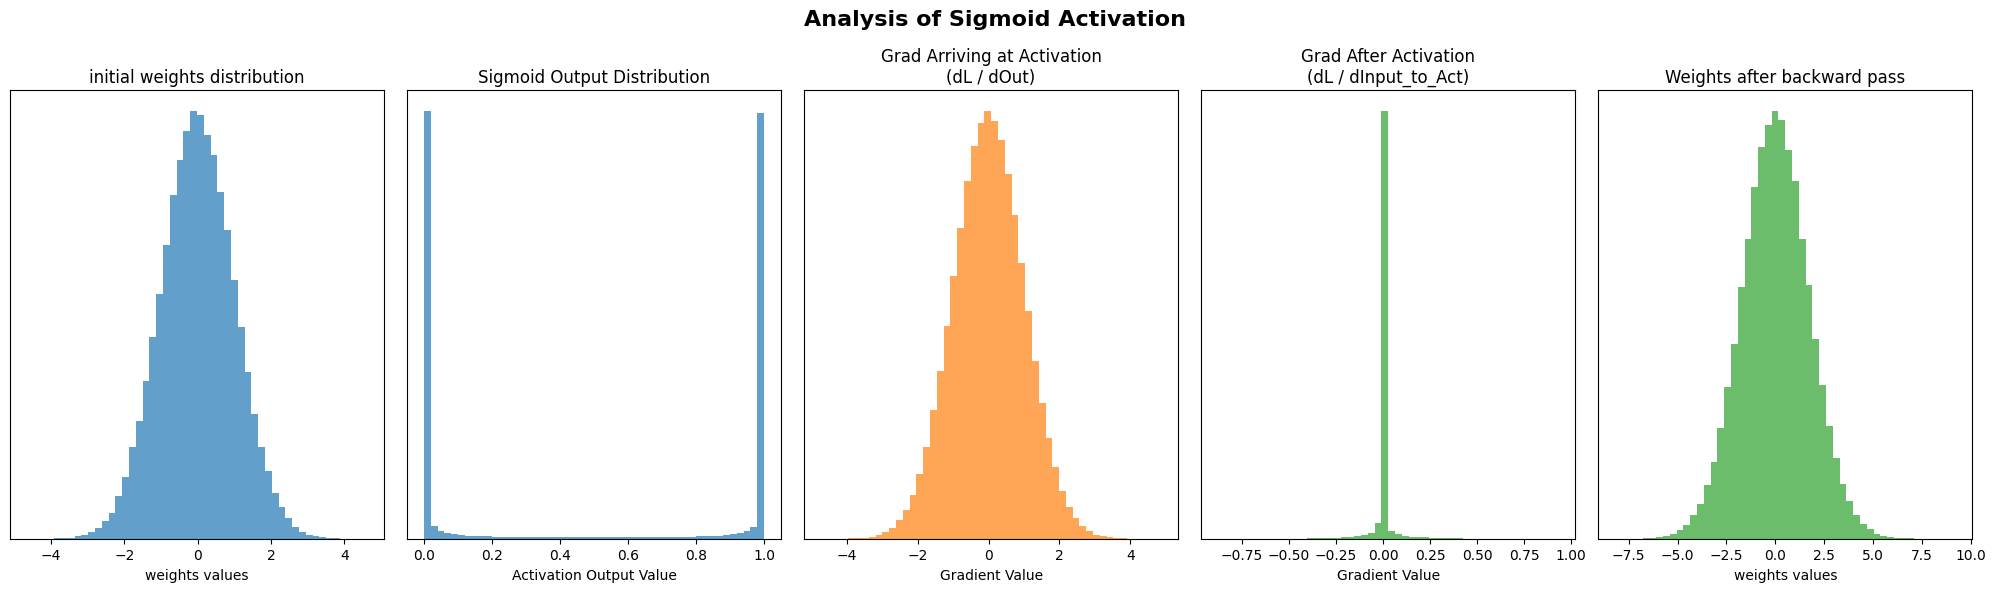

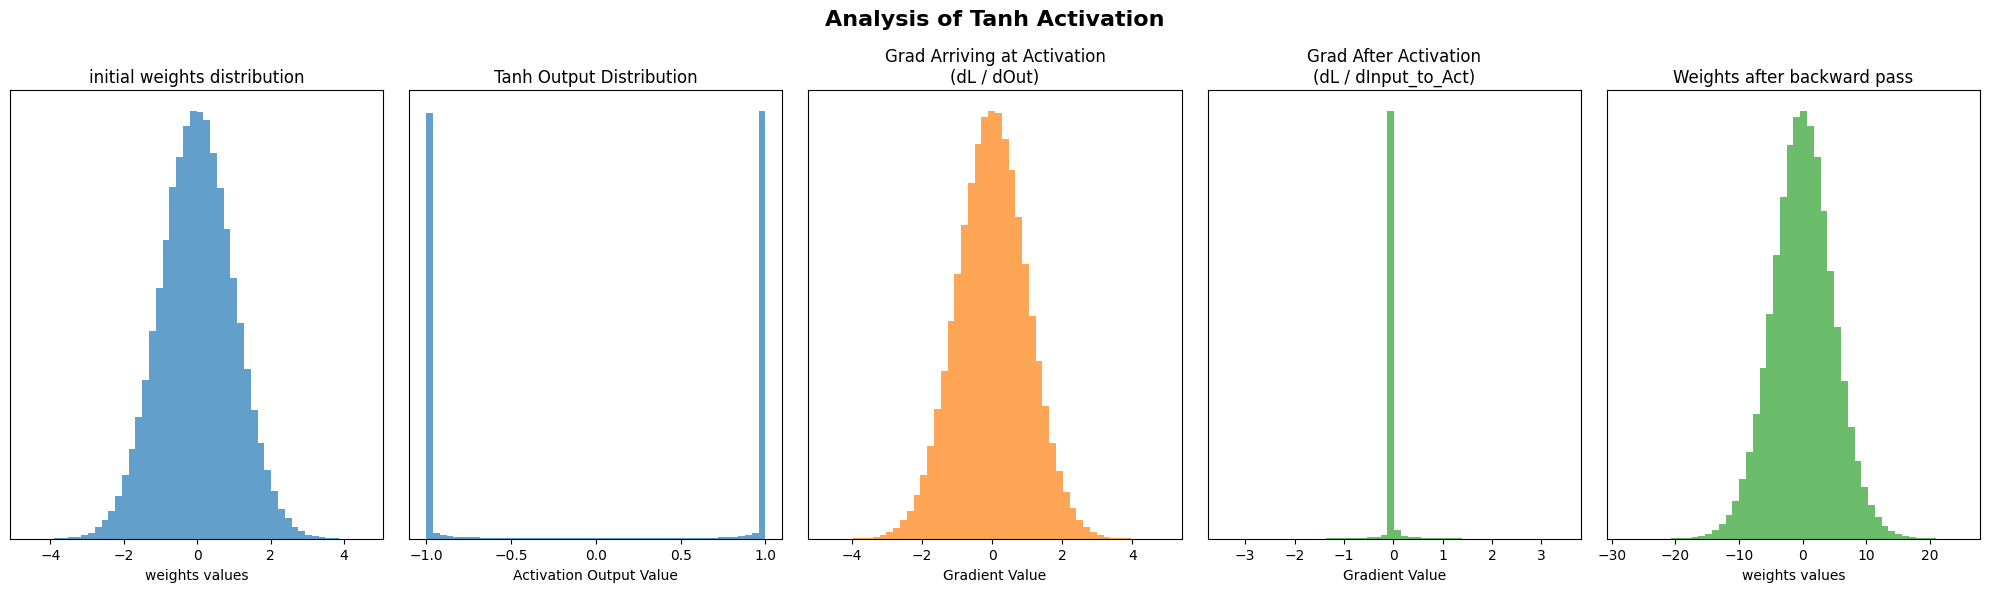

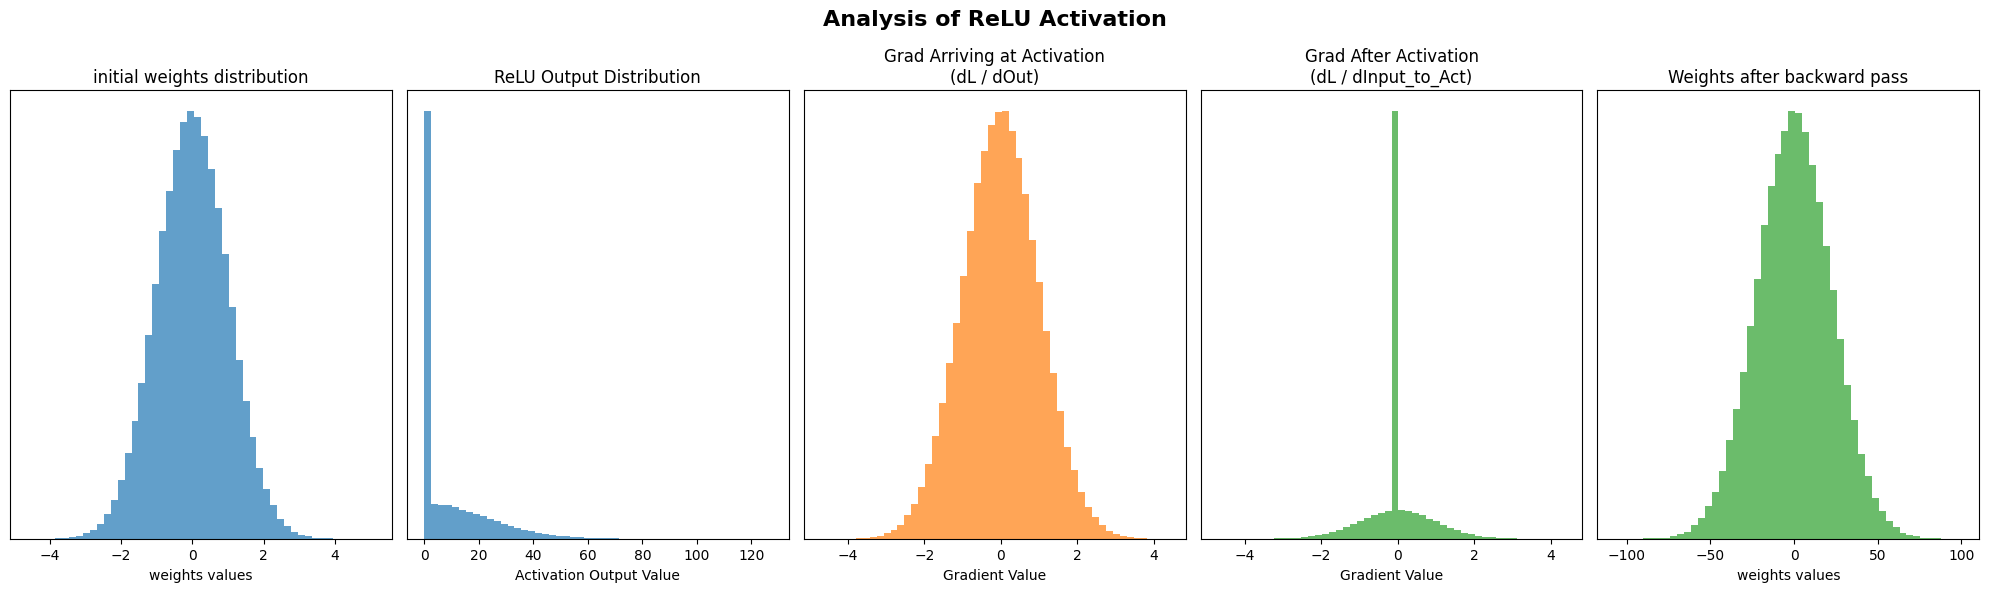

In [30]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


N_SAMPLES = 1000
DIM_INPUT = 500
DIM_HIDDEN = 500


activation_functions = {
    'Sigmoid': torch.sigmoid,
    'Tanh': torch.tanh,
    'ReLU': torch.relu
}

def visualize_layer(act_name, act_fn):
    X = torch.randn(N_SAMPLES, DIM_INPUT, requires_grad=True)
    W = torch.randn(DIM_INPUT, DIM_HIDDEN,  requires_grad=True)
    W.retain_grad()
    
    plt.figure(figsize=(20, 6))
    plt.suptitle(f'Analysis of {act_name} Activation', fontsize=16, fontweight='bold')
    
    plt.subplot(1, 5, 1)
    plt.hist(W.data.view(-1).numpy(), bins=50, color='#1f77b4', alpha=0.7)
    plt.title(f'initial weights distribution')
    plt.xlabel('weights values')
    plt.yticks([])
    
    
    pre_act = X @ W
    pre_act.retain_grad()
    
    out = act_fn(pre_act)
    out.retain_grad()
    
    # lets try with some dummy loss
    loss = out * torch.randn_like(out) 
    loss = loss.sum()
    loss.backward()
    
    
    
    plt.subplot(1, 5, 2)
    plt.hist(out.data.view(-1).numpy(), bins=50, color='#1f77b4', alpha=0.7)
    plt.title(f'{act_name} Output Distribution')
    plt.xlabel('Activation Output Value')
    plt.yticks([])
    

    plt.subplot(1, 5, 3)
    plt.hist(out.grad.view(-1).numpy(), bins=50, color='#ff7f0e', alpha=0.7)
    plt.title('Grad Arriving at Activation\n(dL / dOut)')
    plt.xlabel('Gradient Value')
    plt.yticks([])

    plt.subplot(1, 5, 4)
    plt.hist(pre_act.grad.view(-1).numpy(), bins=50, color='#2ca02c', alpha=0.7)
    plt.title('Grad After Activation\n(dL / dInput_to_Act)')
    plt.xlabel('Gradient Value')
    plt.yticks([])
    
    plt.subplot(1, 5, 5)
    plt.hist(W.grad.view(-1).numpy(), bins=50, color='#2ca02c', alpha=0.7)
    plt.title('Weights after backward pass')
    plt.xlabel('weights values')
    plt.yticks([])
    
    plt.tight_layout()
    plt.savefig(f'rand_weights_{act_fn}.png', dpi=150, bbox_inches='tight')
    plt.show()


for name, func in activation_functions.items():
    visualize_layer(name, func)

In [19]:
import math

In [24]:
def HeWeights(in_features: int, out_features: int):
    limit = math.sqrt(6.0/in_features)
    weights = torch.empty(in_features, out_features)
    weights = weights.uniform_(-limit, limit)
    weights.requires_grad = True
    return weights

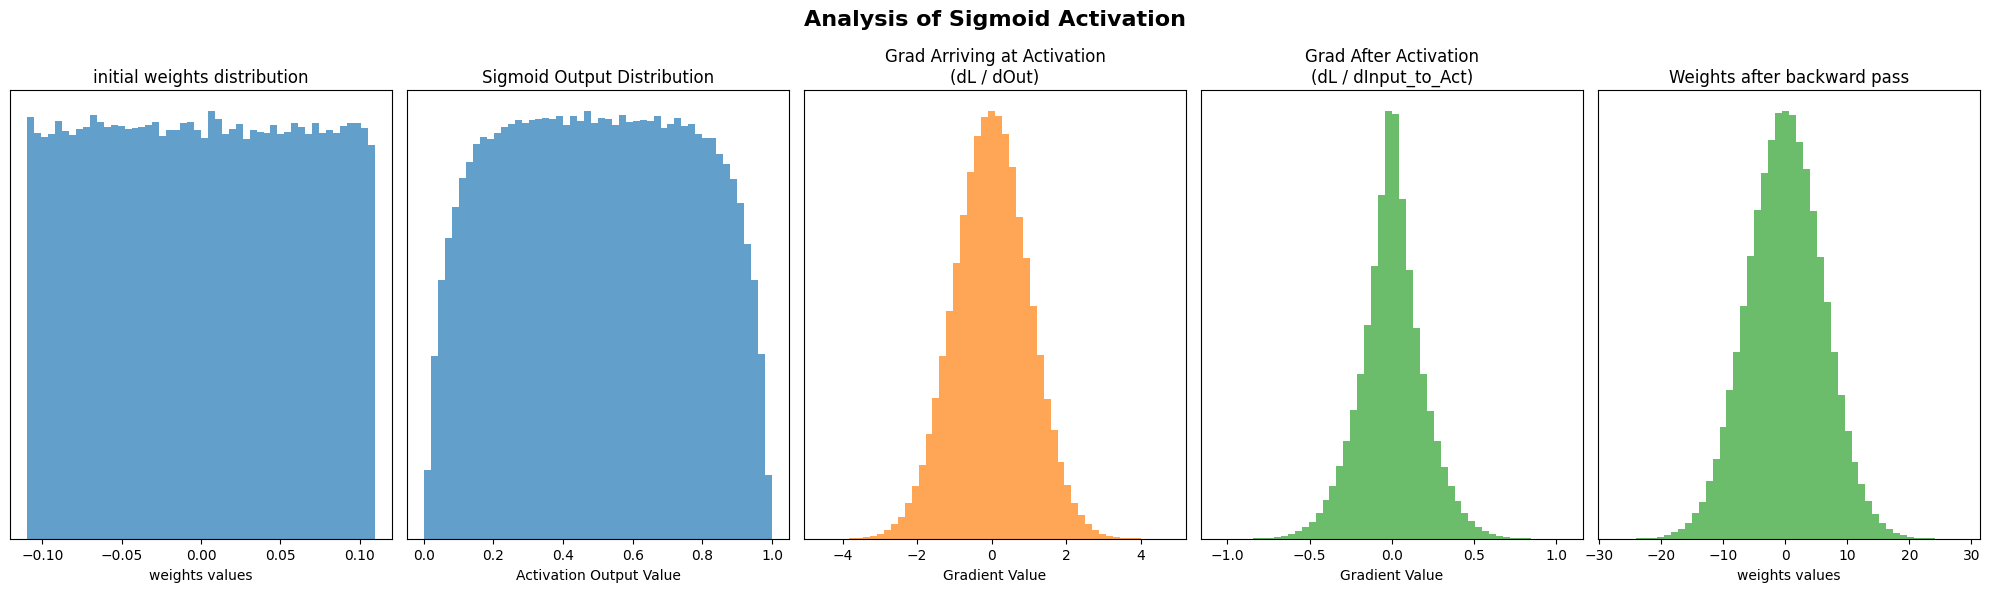

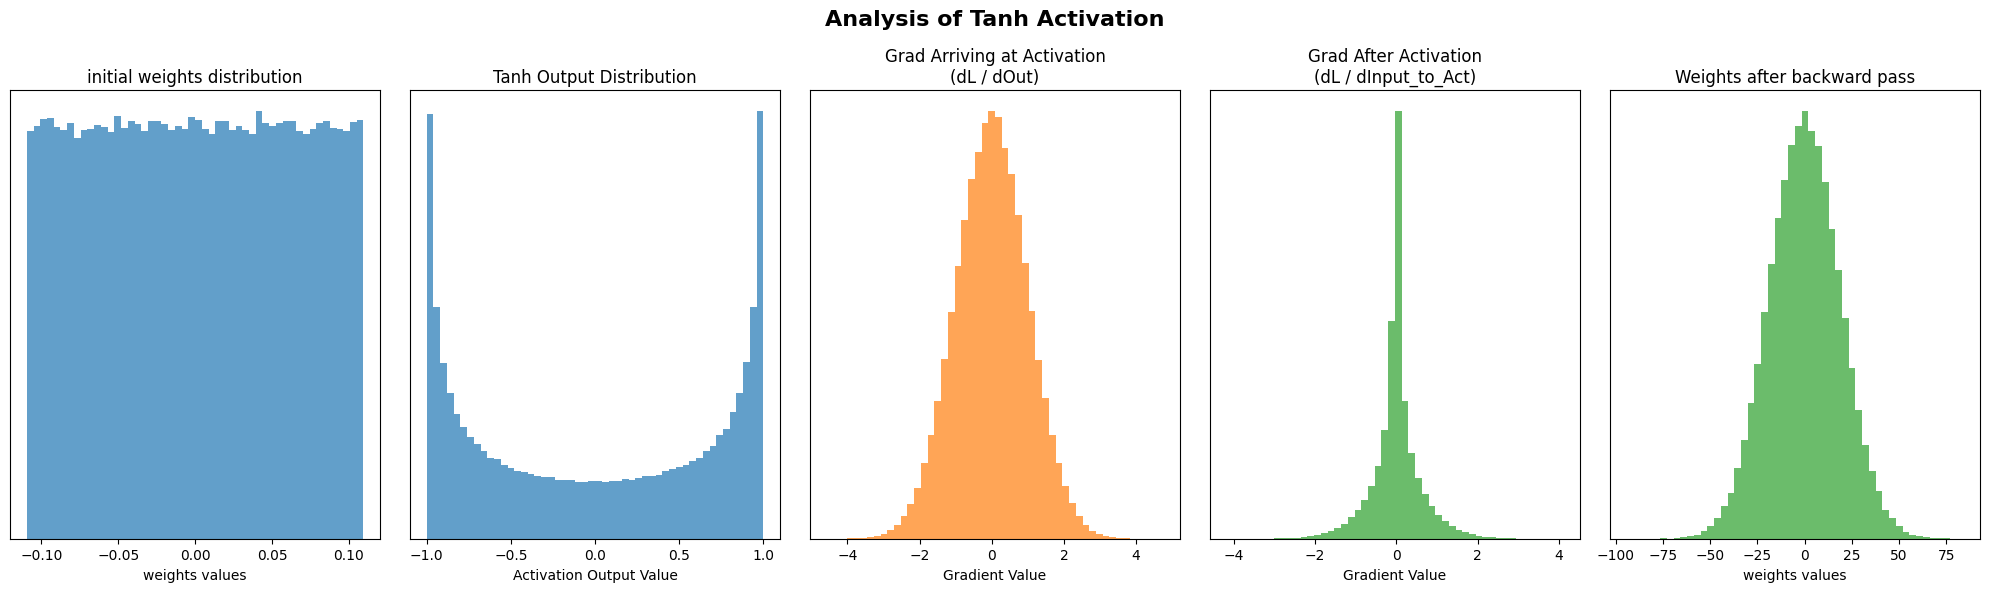

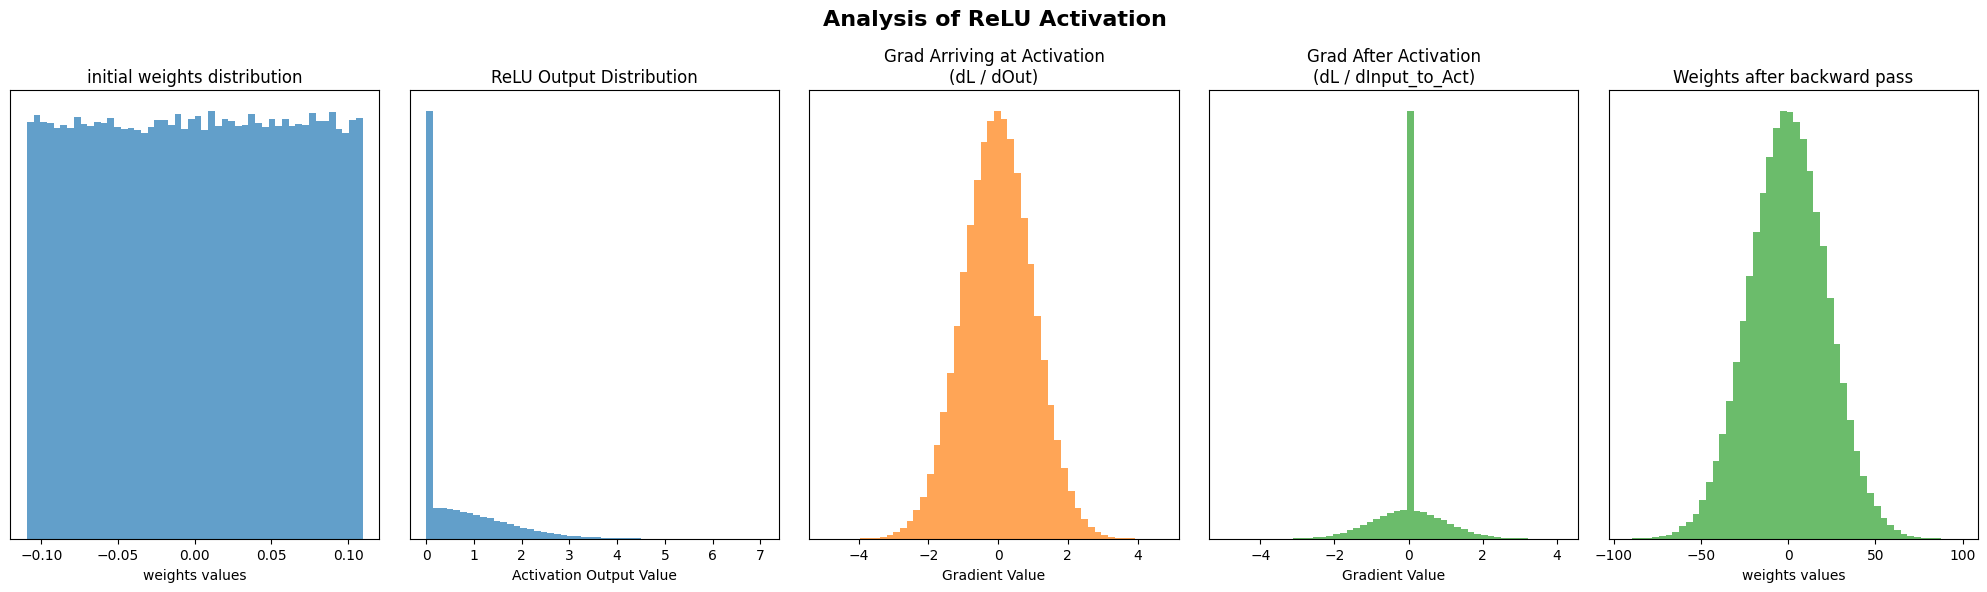

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


N_SAMPLES = 1000
DIM_INPUT = 500
DIM_HIDDEN = 500


activation_functions = {
    'Sigmoid': torch.sigmoid,
    'Tanh': torch.tanh,
    'ReLU': torch.relu
}

def visualize_layer(act_name, act_fn):
    X = torch.randn(N_SAMPLES, DIM_INPUT, requires_grad=True)
    W = HeWeights(DIM_INPUT, DIM_HIDDEN)
    W.retain_grad()
    
    plt.figure(figsize=(20, 6))
    plt.suptitle(f'Analysis of {act_name} Activation', fontsize=16, fontweight='bold')
    
    plt.subplot(1, 5, 1)
    plt.hist(W.data.view(-1).numpy(), bins=50, color='#1f77b4', alpha=0.7)
    plt.title(f'initial weights distribution')
    plt.xlabel('weights values')
    plt.yticks([])
    
    
    pre_act = X @ W
    pre_act.retain_grad()
    
    out = act_fn(pre_act)
    out.retain_grad()
    
    # lets try with some dummy loss
    loss = out * torch.randn_like(out) 
    loss = loss.sum()
    loss.backward()
    
    
    
    plt.subplot(1, 5, 2)
    plt.hist(out.data.view(-1).numpy(), bins=50, color='#1f77b4', alpha=0.7)
    plt.title(f'{act_name} Output Distribution')
    plt.xlabel('Activation Output Value')
    plt.yticks([])
    

    plt.subplot(1, 5, 3)
    plt.hist(out.grad.view(-1).numpy(), bins=50, color='#ff7f0e', alpha=0.7)
    plt.title('Grad Arriving at Activation\n(dL / dOut)')
    plt.xlabel('Gradient Value')
    plt.yticks([])

    plt.subplot(1, 5, 4)
    plt.hist(pre_act.grad.view(-1).numpy(), bins=50, color='#2ca02c', alpha=0.7)
    plt.title('Grad After Activation\n(dL / dInput_to_Act)')
    plt.xlabel('Gradient Value')
    plt.yticks([])
    
    plt.subplot(1, 5, 5)
    plt.hist(W.grad.view(-1).numpy(), bins=50, color='#2ca02c', alpha=0.7)
    plt.title('Weights after backward pass')
    plt.xlabel('weights values')
    plt.yticks([])
    
    plt.tight_layout()
    plt.show()
    plt.savefig(f'HE_weights_{act_fn}.png')


for name, func in activation_functions.items():
    visualize_layer(name, func)